# <center>MACHINE LEARNING <br> <br> Problem Session 9 <br> Multilayer Perceptron: Neural Networks</center>

## Exercise 1

In this exercise we will create our own Neural Network based on a Multilayer Perceptron architecture and modify it to add NN's hyperparameters as **learning rate** or **size of hidden layer**.
The MLP is formed by a hidden layer with **4 neurons** for a **binary classification**. 
The input data is a 2D dataset.

In [212]:
# Imports
import numpy as np 
from matplotlib import pyplot as plt

#Utils
# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

In [268]:
# Class definition
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.number_neurons_hidden=4
        self.weights1= np.random.rand((self.input.shape[1]+1),self.number_neurons_hidden) # considering we have 4 nodes in the hidden layer and include and extra w for w0
        print ("Initialized weights layer1\n",self.weights1)
        self.weights2 = np.random.rand((self.number_neurons_hidden+1),1)# considering we have 4 nodes in the hidden layer and include and extra w for w0 for last neuron
        print("Initialized weights layer2\n",self.weights2)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        #We add a column of "1" to input_data to multiply with w0 at first hidden layer
        self.input_aux=np.c_[np.ones(self.input.shape[0]), self.input]
        self.layer1_output = sigmoid(np.dot(self.input_aux, self.weights1))
        #We add a column of "1" to input data to the second layer to multiply with w0 at second layer
        self.layer1_output_aux=np.c_[np.ones(self.layer1_output.shape[0]),self.layer1_output]
        self.layer2_output = sigmoid(np.dot(self.layer1_output_aux, self.weights2))
        return self.layer2_output
        
    def backprop(self):
        d_weights2 = np.dot(self.layer1_output_aux.T, 2*(self.y -self.output)*sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input_aux.T, np.dot(2*(self.y -self.output)*sigmoid_derivative(self.output), self.weights2[1:].T)*sigmoid_derivative(self.layer1_output))
        self.weights1 += d_weights1
        self.weights2 += d_weights2     

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()

In [269]:
# Training data with 2 feature, i.e.  [X1, X2]
X=np.array(([0,0],[0,1],[1,0],[1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)

#Vector to store the loss in every iteration
loss=[]
#Create the neural network
NN = NeuralNetwork(X,y)
#Number of iterations
epochs=1500
for i in range(epochs):
    NN.train(X, y)
    loss.append(np.mean(np.square(y - NN.feedforward())))

Initialized weights layer1
 [[0.5550109  0.158578   0.7140758  0.42678796]
 [0.79860789 0.4206437  0.41902794 0.55112585]
 [0.62358346 0.8628681  0.5188095  0.46046228]]
Initialized weights layer2
 [[0.6535145 ]
 [0.52397624]
 [0.3399177 ]
 [0.61291963]
 [0.65902453]]


a) Execute the following code for epochs=1500. 

- Which is the initialized coeficients for layer 1? And the last coeficients for layer 1?
- Which is the initialized coeficients for layer 2? And the last coeficients for layer 2?
- Which is the initial error? And the last error?
- Plot the error vs number of epochs

Last weights at layer1:
 [[-2.84651419 -6.25317927 -1.05878889 -0.91031842]
 [ 6.50879309  4.02269507  0.8825832   0.8490322 ]
 [ 6.46889676  4.10463848  0.83412371  0.76442017]]
Last weights at layer2:
 [[-2.66888359]
 [10.10872802]
 [-8.61302752]
 [-2.93028544]
 [-2.6194413 ]]
First error:
 0.33237469741374703
Last error:
 0.0005695893507940812


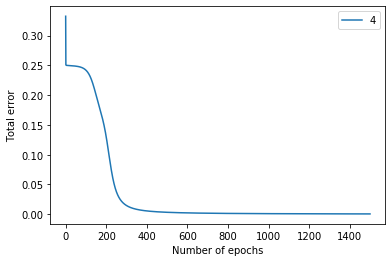

In [270]:
#Solution
print ("Last weights at layer1:\n", NN.weights1)
print ("Last weights at layer2:\n", NN.weights2)
print ("First error:\n", loss[0])
print ("Last error:\n",loss[epochs-1] )
plt.plot (loss, label=NN.number_neurons_hidden)
plt.xlabel('Number of epochs')
plt.ylabel('Total error')
plt.legend()


b) Modify the class Neural Network to incorporate the following variables in the code:

- `n_nn_hidden_layer` that represents the number of neurons at the hidden layer. 
- `learning_rate` to adjust the gradient descent of both layers.

In [271]:
#Solution
# Class definition
class NeuralNetwork:
    def __init__(self, x,y, n_nn_hidden_layer, learning_rate):
        self.input = x
        self.learning_rate=learning_rate
        print("Number of neurons in hidden layer:\n",n_nn_hidden_layer)
        self.weights1= np.random.rand((self.input.shape[1]+1),n_nn_hidden_layer) # considering we have 4 nodes in the hidden layer and include and extra w for w0
        print ("Initialized weights layer1\n",self.weights1)
        self.weights2 = np.random.rand((n_nn_hidden_layer+1),1)# considering we have 4 nodes in the hidden layer and include and extra w for w0 for last neuron
        print("Initialized weights layer2\n",self.weights2)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        #We add a column of "1" to input_data to multiply with w0 at first hidden layer
        self.input_aux=np.c_[np.ones(self.input.shape[0]), self.input]
        self.layer1_output = sigmoid(np.dot(self.input_aux, self.weights1))
        #We add a column of "1" to input data to the second layer to multiply with w0 at second layer
        self.layer1_output_aux=np.c_[np.ones(self.layer1_output.shape[0]),self.layer1_output]
        self.layer2_output = sigmoid(np.dot(self.layer1_output_aux, self.weights2))
        return self.layer2_output
        
    def backprop(self):
        d_weights2 = np.dot(self.layer1_output_aux.T, 2*(self.y -self.output)*sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input_aux.T, np.dot(2*(self.y -self.output)*sigmoid_derivative(self.output), self.weights2[1:].T)*sigmoid_derivative(self.layer1_output))
        self.weights1 += self.learning_rate*d_weights1
        self.weights2 += self.learning_rate*d_weights2     

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()

c) Execute the previous code for a `learning rate`=1 and the following size of the hidden layer: [1, 2, 4, 6, 8, 10].
- Which is the initialized coeficients for layer 1 for size=10? And the last coeficients for layer 1 for size=10?
- Which is the initialized coeficients for layer 2 for size=10? And the last coeficients for layer 2 for size=10?
- Which is the initial error for every size? And the last error for every size?
- Plot the error vs number of epochs for every size. Which is the size with the largest error after the training?

Number of neurons in hidden layer:
 1
Initialized weights layer1
 [[0.5445217 ]
 [0.36607945]
 [0.49885645]]
Initialized weights layer2
 [[0.19893613]
 [0.20772309]]
Last weights at layer1:
 [[-1.056713 ]
 [ 7.8218936]
 [ 7.8219244]]
Last weights at layer2:
 [[-4.88542686]
 [ 5.58050497]]
Last error:
 0.16738190580874435
Number of neurons in hidden layer:
 2
Initialized weights layer1
 [[0.55061621 0.9335859 ]
 [0.30102207 0.47053636]
 [0.16687484 0.15786058]]
Initialized weights layer2
 [[0.02194703]
 [0.04643033]
 [0.41206864]]
Last weights at layer1:
 [[-6.63780097 -2.7745034 ]
 [ 4.32700732  6.32700998]
 [ 4.32151923  6.30283881]]
Last weights at layer2:
 [[-4.11408822]
 [-9.70418853]
 [ 8.97908965]]
Last error:
 0.0005943093176189944
Number of neurons in hidden layer:
 4
Initialized weights layer1
 [[0.16869476 0.6696066  0.74239081 0.706038  ]
 [0.06027892 0.41172628 0.07816189 0.46053938]
 [0.38426195 0.70717496 0.72177769 0.4053992 ]]
Initialized weights layer2
 [[0.36147702]
 

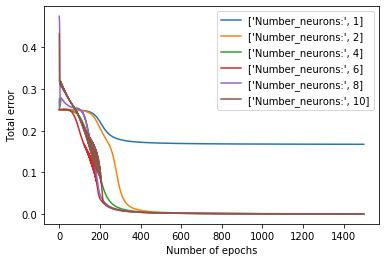

In [272]:
#Solution
# Training data with 2 feature, i.e.  [X1, X2]
X=np.array(([0,0],[0,1],[1,0],[1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)



#Hyperparameters of the neural network        
l_rate=1
size_hidden_layers=[1, 2, 4, 6, 8, 10]

#Vector to store the loss in every iteration
for number_neurons in size_hidden_layers:
    loss=[]
    #Create the neural network
    NN = NeuralNetwork(X,y,number_neurons,l_rate)
    #Number of iterations
    epochs=1500
    for i in range(epochs):
        NN.train(X, y)
        loss.append(np.mean(np.square(y - NN.feedforward())))
    print ("Last weights at layer1:\n", NN.weights1)
    print ("Last weights at layer2:\n", NN.weights2)
    print ("Last error:\n",loss[epochs-1] )
    plt.plot (loss, label=["Number_neurons:",number_neurons])
    plt.xlabel('Number of epochs')
    plt.ylabel('Total error')
    plt.legend()


d) Execute the previous code for a `size of the hidden layer`=4 and the following values for the learning rate: [0.01, 0.1, 0.5, 1, 10, 50].
- Which is the final error for learning rate=0.01? And for learning rate=50?
- With learning rate= 10, does the error converge to a minimum value? If it does, how many epochs are needed?
- Which learning rate converges before: learning rate=1 or learning rate=0.5?
- Which learning rate achieves a lowest error: learning rate=1 or learning rate=0.01?
- From your point of view, which is your recommended learning rate? Why?
- Plot the error vs number of epochs for every learning rate. Which is the learning rate with the largest error after the training?

Number of neurons in hidden layer:
 4
Initialized weights layer1
 [[0.42162043 0.7023223  0.85654758 0.77758978]
 [0.49056755 0.77716115 0.16495222 0.57426273]
 [0.79891328 0.89862831 0.97551455 0.03051053]]
Initialized weights layer2
 [[0.19133222]
 [0.65807214]
 [0.34160801]
 [0.95509904]
 [0.4294543 ]]
Learning rate: 0.01
Last error:
 0.24886388949792898
Number of neurons in hidden layer:
 4
Initialized weights layer1
 [[0.57135403 0.58162421 0.99638458 0.53808193]
 [0.57296097 0.02885798 0.77580175 0.51302684]
 [0.08600664 0.47515622 0.12400635 0.43393237]]
Initialized weights layer2
 [[0.80103409]
 [0.30006128]
 [0.50279059]
 [0.72560891]
 [0.18689683]]
Learning rate: 0.1
Last error:
 0.22790865959629558
Number of neurons in hidden layer:
 4
Initialized weights layer1
 [[0.93881957 0.48905259 0.74867987 0.50758091]
 [0.77174995 0.57462835 0.08290278 0.73785056]
 [0.95386924 0.40107421 0.46293773 0.16173328]]
Initialized weights layer2
 [[0.342934  ]
 [0.15526598]
 [0.54723957]
 [0

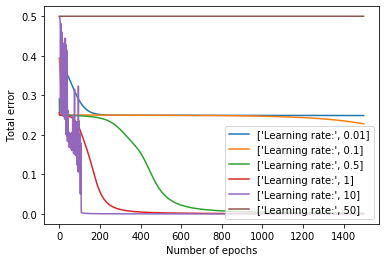

In [273]:
##### Solution
# Each row is a training example, each column is a feature  [X1, X2]
X=np.array(([0,0],[0,1],[1,0],[1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)



#Hyperparameters of the neural network        
learning_rates=[0.01, 0.1, 0.5, 1, 10, 50]
number_neurons=4
#Vector to store the loss in every iteration
for l_rate in learning_rates:
    loss=[]
    #Create the neural network
    NN = NeuralNetwork(X,y,number_neurons,l_rate)
    #Number of iterations
    epochs=1500
    for i in range(epochs):
        NN.train(X, y)
        loss.append(np.mean(np.square(y - NN.feedforward())))
    print("Learning rate:", l_rate)
    print ("Last error:\n",loss[epochs-1] )
    plt.plot (loss, label=["Learning rate:",l_rate])
    plt.xlabel('Number of epochs')
    plt.ylabel('Total error')
    plt.legend(loc='lower right')

print ("The recommended learning rate is 1. Learning rate=50 does not converge and learning rate=10 converges after 150 epochs approx.")